In [4]:
from mpl_toolkits.basemap import Basemap
import netCDF4 as nc
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.basemap import maskoceans
from mpl_toolkits.basemap import interp
import numpy.ma as ma
from matplotlib.path import Path
from matplotlib.patches import Polygon
from matplotlib.patches import PathPatch
import matplotlib.pyplot as plt
import numpy
import shapefile
import pandas as pd
import os
from scipy.io import loadmat
from matplotlib.ticker import MultipleLocator, FormatStrFormatter
%matplotlib inline
plt.rcParams['font.sans-serif']=['SimHei']

In [207]:
da = pd.read_csv(r'D:\project\biyesheji\Code\data\AERONET\jingweidu.csv')
data = pd.read_csv(r'D:\project\biyesheji\Code\aeronotstaite.csv',header=0)
data.head()

,Site_Name,H,Latitude,Longitude,t,count
0,Beijing-CAMS,106.0,39.93300,116.31700,2015-01-01-2017-12-31,87804
1,XuZhou_CUMT,59.7,34.21667,117.14167,2015-01-01-2018-12-31,21843
2,AOE_Baotou,1314.0,40.85170,109.62880,2014-01-01-2017-11-16,20483
3,NAM_CO,4746.0,30.77250,90.96245,2014-05-03-2018-12-31,5117


In [10]:
def set_lonlat(_m, lon_list, lat_list, lon_labels, lat_labels, lonlat_size):
    """
    为Basemap实例画带tick标的经纬度注释
    自带画水平线和竖直线标注方式不带刻度标
    当然函数仍调用了自带标注函数只是在此基础上加了tick标
    :param _m: Basemap实例
    :param lon_list: 经度 详见Basemap.drawmeridians函数介绍
    :param lat_list: 纬度 同上
    :param lon_labels: 标注位置 [左, 右, 上, 下] bool值 默认只标注左上待完善 可使用twinx和twiny实现
    :param lat_labels: 同上
    :param lonlat_size: 字体大小
    :return:
    """
    lon_dict = _m.drawmeridians(lon_list, labels=lon_labels, color='none', fontsize=lonlat_size)
    lat_dict = _m.drawparallels(lat_list, labels=lat_labels, color='none', fontsize=lonlat_size)
    lon_list = []
    lat_list = []
    for lon_key in lon_dict.keys():
        try:
            lon_list.append(lon_dict[lon_key][1][0].get_position()[0])
        except:
            continue

    for lat_key in lat_dict.keys():
        try:
            lat_list.append(lat_dict[lat_key][1][0].get_position()[1])
        except:
            continue
    ax = plt.gca()
    ax.xaxis.tick_bottom()
    ax.set_yticks(lat_list)
    ax.set_xticks(lon_list)
    ax.tick_params(labelcolor='none')

In [213]:
def plot_map0(da,data,title):
    '''
    da:所有的
    data:研究站
    '''
    lonlon=da['Longitude']
    latlat=da['Latitude']
    n = data["count"]
    Lon = data['Longitude']
    Lat = data['Latitude']
    Site_name = data['Site_Name']
    plt.plot(figsize=(16,9),dpi=200)
    m = Basemap(projection='cyl',resolution='f',llcrnrlon=73.1,llcrnrlat=17,urcrnrlon=136,urcrnrlat=54.5,lon_0=110.,lat_0=60)
    #m = Basemap(projection='cyl',resolution='h',llcrnrlon=72.33,llcrnrlat=15,urcrnrlon=138.16,urcrnrlat=53.5,lon_0=106.,lat_0=33.)
    m.readshapefile(r'D:\project\biyesheji\Code\shp\g\bou1_4l', 'china', drawbounds=True)
    lon_s,lat_s = m(Lon,Lat)
    llo,lla=m(lonlon,latlat)
    #cs=m.pcolormesh(lon,lat,val,latlon=True,cmap='rainbow')
    ti=1
    for ii, jj in zip(llo,lla):
        m.scatter(llo,lla,s=3,c='blue')
    for i, j, name in zip(lon_s, lat_s, Site_name):
        m.scatter(lon_s,lat_s,s=n/1000,c='r')
        while ti != 3:
            plt.text(i, j+1, name, rotation=0, fontsize=15)
            break
        while ti == 3:
            plt.text(i-8, j+1, name, rotation=0, fontsize=15)
            break
        ti+=1
        set_lonlat(m, np.arange(82,136,12), np.arange(3,52,10), [0, 0, 0, 1], [1, 0, 0, 0], 12)
    #plt.title(title,size=20)

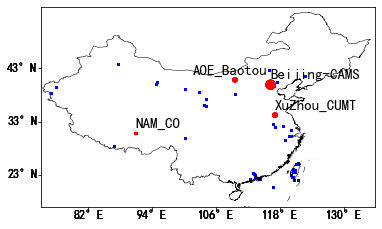

In [214]:
plot_map0(da,data,"本研究选取AERNOET站点空间分布")#gis_osm_water_a_free_1.shp

In [97]:
data1 = pd.read_csv(r'D:\project\biyesheji\Code\aeronotstaite0.csv',header=0)
data1.head()

,Site_Name,H,Latitude,Longitude,t,count
0,Beijing-CAMS,106,39.9330,116.3170,2014-01-01-2018-06-28,87804
1,XiangHe,36,39.7536,116.9615,2014-01-01-2014-11-08,2301


In [142]:
def plot_map1(data):
    n = data["count"]
    Lon = data['Longitude']
    Lat = data['Latitude']
    Site_name = data['Site_Name']
    plt.plot(figsize=(16,9),dpi=150)
    m = Basemap(projection='cyl',resolution='h',llcrnrlon=114,llcrnrlat=39,urcrnrlon=119,urcrnrlat=42,lon_0=120,lat_0=90)
    set_lonlat(m, np.arange(114,120.1,1), np.arange(39,42.1,1), [0, 0, 0, 1], [1, 0, 0, 0], 12)
    m.readshapefile(r'D:\project\biyesheji\Code\shp\s\bou2_4l', 'china', drawbounds=True)
    lon_s,lat_s = m(Lon,Lat)
    lt=0
    for i, j, name in zip(lon_s, lat_s, Site_name):
        m.scatter(lon_s,lat_s,s=n/100,c='r')

        while lt==0:
            plt.text(i, j+0.4, name, fontsize=20)
            break
        while lt==1:
            plt.text(i, j-0.4, name, fontsize=20)
            break
        lt=lt+1
    #plt.title(title,size=25)

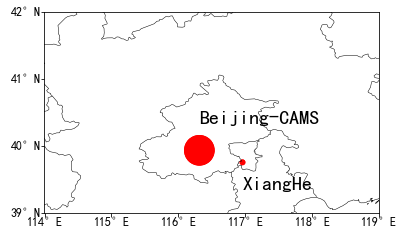

In [143]:
plot_map1(data1)